# A short tutorial of SpaOTsc demonstrating main functions using drosophila embryo as example.
The run time of each block was tested on a normal desktop with an i7 8700K CPU and 16G of RAM. The input data are stored in the folder "original_data" and the key outputs are stored in "spaotsc_files".

In [1]:
from spaotsc import SpaOTsc
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialization

In [2]:
%%time
# set up the data directory
datadir = "./data/original_data"
spaotsc_datadir = "./data/spaotsc_files"
# read in the data files as pandas DataFrames with rows being cells and columns being genes
df_sc = pd.read_csv(datadir+'/dm_sc_normalized.txt', sep='\t', index_col=0)
df_sc_bin = pd.read_csv(datadir+'/dm_sc_isg_binarized.txt', sep='\t', index_col=0)
df_is = pd.read_csv(datadir+'/dm_is.txt', sep='\t', index_col=0)
df_is_bin = pd.read_csv(datadir+'/dm_is_binarized.txt', sep='\t', index_col=0)
# Load the precomputed matthew's correlation coefficient between the binarized lankmark genes across datasets
mcc = np.load(datadir+'/dm_sc_is_mcc.npy')
# Construct the cost matrix for transport
C = np.exp(1-mcc)
# Load the precomputed pearson's correlation coefficient within the single cell data
sc_pcc = np.load(datadir+'/dm_scanpy_pca40_pcc.npy')
# Load the geodesic distance between locations in spatial data
is_dmat = np.load(datadir+'/dm_pos_pos_geodesic_mgeom.npy')
# Initiate the SpaOTsc object
issc = SpaOTsc.spatial_sc(sc_data=df_sc, sc_data_bin=df_sc_bin, is_data=df_is, is_data_bin=df_is_bin, sc_dmat = np.exp(1-sc_pcc), is_dmat = is_dmat)
# Wall time 2.35 s

CPU times: user 2.25 s, sys: 84.3 ms, total: 2.33 s
Wall time: 2.36 s


# Mapping between datasets

In [3]:
%%time
# Generate the mapping between datasets
issc.transport_plan(C**2, alpha=0.1, rho=100.0, epsilon=1.0, cor_matrix=mcc, scaling=False)
# Wall time 5min 39s

CPU times: user 17min 28s, sys: 12min 5s, total: 29min 34s
Wall time: 5min 51s


array([[3.65251970e-07, 4.71256747e-07, 2.61422063e-07, ...,
        5.36520943e-08, 8.57488106e-09, 6.81265973e-09],
       [1.77877830e-08, 5.19501526e-08, 2.85162966e-08, ...,
        3.20758381e-08, 6.05357732e-08, 1.35744191e-07],
       [4.75455898e-07, 3.84542878e-07, 3.40351441e-07, ...,
        5.57754083e-07, 6.11335602e-07, 1.39965010e-06],
       ...,
       [2.80997511e-09, 6.20177402e-08, 1.98093113e-08, ...,
        5.41767812e-07, 1.03923030e-06, 2.26772008e-08],
       [1.77750398e-06, 4.49040220e-07, 8.70389224e-07, ...,
        5.76821665e-08, 1.86179135e-09, 1.54646331e-07],
       [4.80051265e-08, 1.19570750e-07, 7.20731423e-08, ...,
        3.75219246e-07, 3.31018364e-07, 9.45950321e-08]])

# Spatial cell-cell distance

In [4]:
%%time
# Uncomment the following line to recompute
# issc.cell_cell_distance(use_landmark=True, epsilon=0.01, n_landmark=50)
# np.save(spaotsc_datadir+"/dm_cell_cell_ot_sinkhorn_alpha0.1_rho100_epsilon1.0_scalingFalse_landmark50.npy", issc.sc_dmat_spatial)
# To save time, we load the precomputed cell-cell distance
sc_dmat_spatial=np.load(spaotsc_datadir+"/dm_cell_cell_ot_sinkhorn_alpha0.1_rho100_epsilon1.0_scalingFalse_landmark50.npy")
issc.cell_cell_distance(sc_dmat_spatial=sc_dmat_spatial)
# Wall time if recomputing the cell-cell distance: 54min 14s

CPU times: user 0 ns, sys: 2.99 ms, total: 2.99 ms
Wall time: 2.07 ms


# Cell spatial subclustering

0 2 [159, 145]
1 2 [156, 128]
2 2 [177, 68]
3 3 [102, 56, 1]
4 1 [94]
5 1 [80]
6 5 [57, 13, 4, 2, 2]
7 1 [53]
0 304 twi
twi
Cyp310a1
Ilp4
sna
CG4500
0 0 159 Ilp4
Ilp4
CG12177
Cyp310a1
twi
CG4500
0 1 145 twi
twi
Cyp310a1
sna
tin
CG4500
1 284 CG10035
CG10035
Atx-1
CG34224
aop
CG10176
1 0 156 Atx-1
Atx-1
aop
5-HT2A
CG34224
CG10035
1 1 128 cv-2
cv-2
CG10035
CG14915
veil
CG34224
2 245 sog
sog
SoxN
ths
brk
sca
2 0 177 SoxN
SoxN
sog
brk
ths
sca
2 1 68 sog
sog
SoxN
ths
brk
ImpL2
3 159 CG3502
CG3502
CG5059
oc
CG43085
CG13427
3 0 102 CG5059
CG5059
CG3502
oc
fj
CG43085
3 1 56 kek1
kek1
Dll
CG43184
Doc3
grn
4 94 knrl
knrl
kni
ltl
rib
ventrally-expressed-protein-D
4 0 94 knrl
knrl
kni
ltl
rib
ventrally-expressed-protein-D
5 80 apt
apt
CG42762
disco
CG8147
Fas2
5 0 80 apt
apt
CG42762
disco
CG8147
Fas2
6 78 sna
sna
Mef2
twi
ventrally-expressed-protein-D
CG3036
6 0 57 sna
sna
Abd-B
CG42762
Mef2
ventrally-expressed-protein-D
6 1 13 Nplp2
Nplp2
Act87E
gsb
RnpS1
CG14111
6 2 4 ade5
ade5
path
os
gt
CG2100


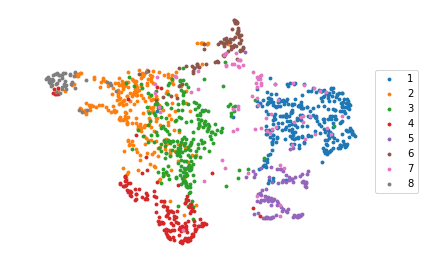

[2 2 2 2 1 1 3 1]


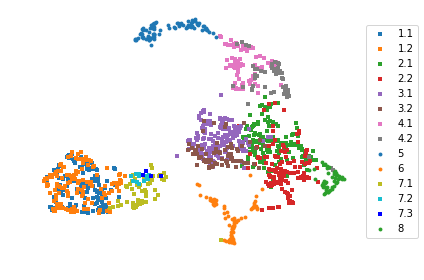

[2 2 2 2 1 1 3 1]


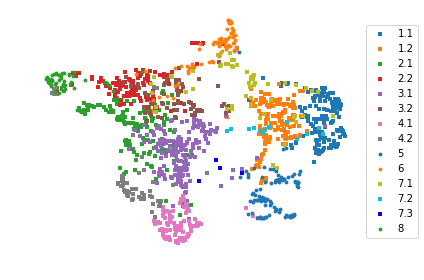

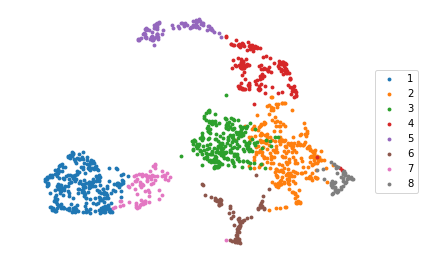

CPU times: user 49.1 s, sys: 4.47 s, total: 53.6 s
Wall time: 45.9 s


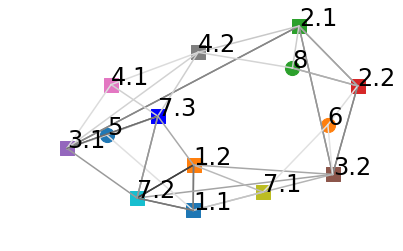

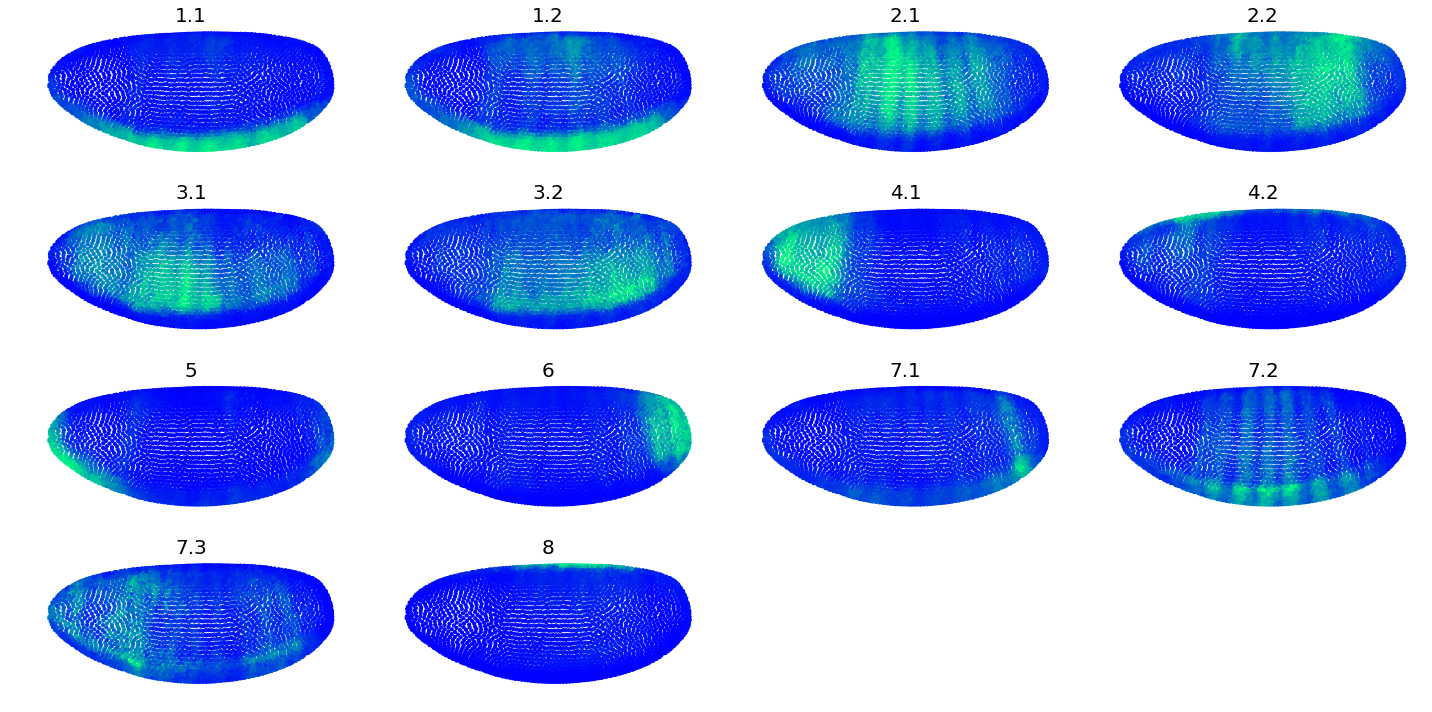

In [6]:
%%time
# Load the spatial coordinates for spatial data
geomdf = pd.read_csv(datadir+'/dm_geometry.txt', sep=' ')
pts = np.array( geomdf.values, float )
pts[:,1] = np.abs(pts[:,1])
# Load the gene list for clustering
selected_genes = list(np.loadtxt(datadir+"/selected_genes.txt", dtype=str))
# Do the clustering and subclustering
issc.clustering(genes = selected_genes, pca_n_components=16)
# Clustering of original scRNA-seq data, visualization using spatial cell-cell distance
issc.visualize_cells(type=1, umap_n_neighbors=15, umap_min_dist=0.2); plt.show(); plt.clf()
# Spatial subclustering, visualization using scRNA-seq data
issc.visualize_cells(type=2, umap_n_neighbors=15, umap_min_dist=0.2); plt.show(); plt.clf()
# Spatial subclustering, visualization using spatial cell-cell distance
issc.visualize_cells(type=3, umap_n_neighbors=15, umap_min_dist=0.2); plt.show(); plt.clf()
# Clustering of original scRNA-seq data, visualization using scRNA-seq data
issc.visualize_cells(type=4, umap_n_neighbors=15, umap_min_dist=0.2); plt.show(); plt.clf()
# Summary visualization of subclusters and their spatial origins
issc.visualize_subclusters(pts=pts[:,np.array([0,2])], umap_k=5, figsize=(20,10))
# Wall time: 56.6 s

# Determine spatial distance for signaling using random forest

[[1.         0.09651985 0.08568766 ... 0.09126156 0.09545832 0.10087674]
 [0.09651985 1.         0.1118445  ... 0.0058331  0.11350713 0.04815083]
 [0.08568766 0.1118445  1.         ... 0.08834247 0.91571997 0.04311147]
 ...
 [0.09126156 0.0058331  0.08834247 ... 1.         0.06512282 0.09573824]
 [0.09545832 0.11350713 0.91571997 ... 0.06512282 1.         0.0473953 ]
 [0.10087674 0.04815083 0.04311147 ... 0.09573824 0.0473953  1.        ]]
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


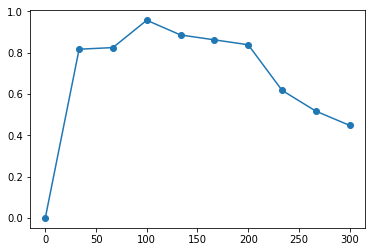

CPU times: user 9min 37s, sys: 27.6 s, total: 10min 5s
Wall time: 2min 57s


In [7]:
%%time
# Get a list of genes to compute correlations
grn_genes = ['dpp','tkv','put','sax','Ance','ush','Doc1','Doc2','Doc3','tup','egr','Wnt5','wg','fz','fz2','Ubx','en','ovo','sr','nmo','CycD','Jra']
selected_genes = list(np.loadtxt(datadir+"/selected_genes.txt", dtype=str))
tmp_genes = selected_genes + list(set(grn_genes)-set(selected_genes))
issc.nonspatial_correlation(genes=tmp_genes)
# Get the effective ranges
er_wg,_ = issc.infer_signal_range_ml(['Wnt5','wg'],['fz'],['CycD','Jra','dpp','Ubx','en'], n_top_g=50, effect_ranges=np.linspace(0,300,10), method='Importance')
plt.plot(er_wg[:,0], er_wg[:,1],'-o')
plt.show()
# Wall time: 2min 57s

# Cell-cell communication by optimal transport

In [8]:
%%time
# S(i,j) is the likelihood of "cell i sending signal to cell j" in Wingless signaling
S_Wnt5 = issc.spatial_signaling_ot(['Wnt5'],['fz'],DSgenes_up = ['CycD','Jra','en'],DSgenes_down=['dpp'], rho=np.Inf, epsilon=0.2, effect_range=100)
S_wg = issc.spatial_signaling_ot(['wg'],['fz'],DSgenes_up = ['CycD','Jra','en'],DSgenes_down=['dpp'], rho=np.Inf, epsilon=0.2, effect_range=100)
S = 0.5*(S_Wnt5+S_wg)
# Wall time: <0.5 s

CPU times: user 1.13 s, sys: 873 ms, total: 2 s
Wall time: 411 ms


# PID spatial map of intercellular gene-gene regulatory information flow

In [8]:
%%time
# Get the list of genes to consider
grn_genes = ['dpp','tkv','put','sax','Ance','ush','Doc1','Doc2','Doc3','tup','egr','Wnt5','wg','fz','CycD','Jra','dpp','Ubx','en']
selected_genes = list(np.loadtxt(datadir+"/selected_genes.txt", dtype=str))
tmp_genes = selected_genes + list(set(grn_genes)-set(selected_genes))
# Put the data into bins using Bayesian blocks
issc.discretize_expression(p0=1E-2)
# Compute the intracellular correlation between genes for selecting background genes
issc.nonspatial_correlation(genes=tmp_genes)
# Wall time: 10min 12s

discretizing gene expressions


100% |########################################################################|


computing nonspatial correlation between genes


CPU times: user 10min 11s, sys: 877 ms, total: 10min 12s
Wall time: 10min 12s


In [9]:
%%time
# PID spatial map of intercellular gene-gene regulatory information flow
selected_genes = np.loadtxt(datadir+"/selected_genes.txt", dtype=str)
X = np.array( issc.sc_data[selected_genes], float )
X_var = np.var(X, axis=0)
sorted_ind = np.argsort(-X_var)
grn_genes = []
for i in sorted_ind[:20]:
    grn_genes.append(selected_genes[i])
eta = 50.0
nbg = 20
# We are examining all gene pairs by setting cor_cut=0.
# Save time by prescreening genes using spatial correlation (setting a larger cor_cut of setting n_top_edge)
df = issc.spatial_grn_range(grn_genes, effect_range=eta, n_top_edge=50, n_top_g_bg = nbg, p0=1E-2)
df.to_csv(spaotsc_datadir+"/grn_var20_eta"+str(int(eta))+"_nbg"+str(nbg)+"_p1E-2.txt", sep='\t')
# Wall time 13min 25s

nb gene bins [0.44625094 0.5419935  1.0893654  1.59381525 4.77515914 5.62259732
 6.33246238]


100% |########################################################################|


nb gene bins [0.44625094 0.5419935  1.0893654  1.59381525 4.77515914 5.62259732
 6.33246238]


100% |########################################################################|


nb gene bins [0.30735375 0.56069349 1.0182468  1.49634195 1.90020992 4.98375641
 5.75366757 6.28173381 6.50198284]


100% |########################################################################|


nb gene bins [0.44625094 0.5419935  1.0893654  1.59381525 4.77515914 5.62259732
 6.33246238]


100% |########################################################################|


nb gene bins [0.30735375 0.56069349 1.0182468  1.49634195 1.90020992 4.98375641
 5.75366757 6.28173381 6.50198284]


100% |########################################################################|


nb gene bins [0.30735375 0.56069349 1.0182468  1.49634195 1.90020992 4.98375641
 5.75366757 6.28173381 6.50198284]


100% |########################################################################|


nb gene bins [0.44625094 0.5419935  1.0893654  1.59381525 4.77515914 5.62259732
 6.33246238]


100% |########################################################################|


nb gene bins [0.24213903 0.29927306 0.88973634 1.24079821 1.7250581  4.22720372
 5.01080821 5.61149571 5.66250977]


100% |########################################################################|


nb gene bins [0.44625094 0.5419935  1.0893654  1.59381525 4.77515914 5.62259732
 6.33246238]


100% |########################################################################|


nb gene bins [0.42565614 0.59432676 1.33661998 1.63380501 1.99029058 4.68338899
 5.43492651 5.96342937 6.37390726]


100% |########################################################################|


nb gene bins [0.30735375 0.56069349 1.0182468  1.49634195 1.90020992 4.98375641
 5.75366757 6.28173381 6.50198284]


100% |########################################################################|


nb gene bins [0.24213903 0.29927306 0.88973634 1.24079821 1.7250581  4.22720372
 5.01080821 5.61149571 5.66250977]


100% |########################################################################|


nb gene bins [0.30735375 0.56069349 1.0182468  1.49634195 1.90020992 4.98375641
 5.75366757 6.28173381 6.50198284]


100% |########################################################################|


nb gene bins [0.42565614 0.59432676 1.33661998 1.63380501 1.99029058 4.68338899
 5.43492651 5.96342937 6.37390726]


100% |########################################################################|


nb gene bins [0.24213903 0.29927306 0.88973634 1.24079821 1.7250581  4.22720372
 5.01080821 5.61149571 5.66250977]


100% |########################################################################|


nb gene bins [0.24213903 0.29927306 0.88973634 1.24079821 1.7250581  4.22720372
 5.01080821 5.61149571 5.66250977]


100% |########################################################################|


nb gene bins [0.42565614 0.59432676 1.33661998 1.63380501 1.99029058 4.68338899
 5.43492651 5.96342937 6.37390726]


100% |########################################################################|


nb gene bins [0.42565614 0.59432676 1.33661998 1.63380501 1.99029058 4.68338899
 5.43492651 5.96342937 6.37390726]


100% |########################################################################|


nb gene bins [0.42565614 0.59432676 1.33661998 1.63380501 1.99029058 4.68338899
 5.43492651 5.96342937 6.37390726]


100% |########################################################################|


nb gene bins [0.24213903 0.29927306 0.88973634 1.24079821 1.7250581  4.22720372
 5.01080821 5.61149571 5.66250977]


100% |########################################################################|


nb gene bins [0.44625094 0.5419935  1.0893654  1.59381525 4.77515914 5.62259732
 6.33246238]


100% |########################################################################|


nb gene bins [0.68027183 1.26083085 1.42431636 2.63546797 5.22290487 6.06274243
 6.29370056]


100% |########################################################################|


nb gene bins [0.30735375 0.56069349 1.0182468  1.49634195 1.90020992 4.98375641
 5.75366757 6.28173381 6.50198284]


100% |########################################################################|


nb gene bins [0.68027183 1.26083085 1.42431636 2.63546797 5.22290487 6.06274243
 6.29370056]


100% |########################################################################|


nb gene bins [0.42565614 0.59432676 1.33661998 1.63380501 1.99029058 4.68338899
 5.43492651 5.96342937 6.37390726]


100% |########################################################################|


nb gene bins [0.68027183 1.26083085 1.42431636 2.63546797 5.22290487 6.06274243
 6.29370056]


100% |########################################################################|


nb gene bins [2.23342553 2.7611696  2.79941242 3.37841815 4.11054084 5.65142746
 7.8626886  8.28817105 8.52052719 8.67022225]


100% |########################################################################|


nb gene bins [2.23342553 2.7611696  2.79941242 3.37841815 4.11054084 5.65142746
 7.8626886  8.28817105 8.52052719 8.67022225]


100% |########################################################################|


nb gene bins [0.68027183 1.26083085 1.42431636 2.63546797 5.22290487 6.06274243
 6.29370056]


100% |########################################################################|


nb gene bins [0.24213903 0.29927306 0.88973634 1.24079821 1.7250581  4.22720372
 5.01080821 5.61149571 5.66250977]


100% |########################################################################|


nb gene bins [0.68027183 1.26083085 1.42431636 2.63546797 5.22290487 6.06274243
 6.29370056]


100% |########################################################################|


nb gene bins [0.68027183 1.26083085 1.42431636 2.63546797 5.22290487 6.06274243
 6.29370056]


100% |########################################################################|


nb gene bins [0.44625094 0.5419935  1.0893654  1.59381525 4.77515914 5.62259732
 6.33246238]


100% |########################################################################|


nb gene bins [2.23342553 2.7611696  2.79941242 3.37841815 4.11054084 5.65142746
 7.8626886  8.28817105 8.52052719 8.67022225]


100% |########################################################################|


nb gene bins [0.24213903 0.29927306 0.88973634 1.24079821 1.7250581  4.22720372
 5.01080821 5.61149571 5.66250977]


100% |########################################################################|


nb gene bins [2.23342553 2.7611696  2.79941242 3.37841815 4.11054084 5.65142746
 7.8626886  8.28817105 8.52052719 8.67022225]


100% |########################################################################|


nb gene bins [0.30735375 0.56069349 1.0182468  1.49634195 1.90020992 4.98375641
 5.75366757 6.28173381 6.50198284]


100% |########################################################################|


nb gene bins [2.23342553 2.7611696  2.79941242 3.37841815 4.11054084 5.65142746
 7.8626886  8.28817105 8.52052719 8.67022225]


100% |########################################################################|


nb gene bins [0.42565614 0.59432676 1.33661998 1.63380501 1.99029058 4.68338899
 5.43492651 5.96342937 6.37390726]


100% |########################################################################|


nb gene bins [2.23342553 2.7611696  2.79941242 3.37841815 4.11054084 5.65142746
 7.8626886  8.28817105 8.52052719 8.67022225]


100% |########################################################################|


nb gene bins [0.68027183 1.26083085 1.42431636 2.63546797 5.22290487 6.06274243
 6.29370056]


100% |########################################################################|


nb gene bins [2.23342553 2.7611696  2.79941242 3.37841815 4.11054084 5.65142746
 7.8626886  8.28817105 8.52052719 8.67022225]


100% |########################################################################|


nb gene bins [1.52641755 1.90924114 2.15058197 2.96057119 4.5231147  5.56474168
 5.91942094 6.80755776 6.99259361]


100% |########################################################################|


nb gene bins [1.52641755 1.90924114 2.15058197 2.96057119 4.5231147  5.56474168
 5.91942094 6.80755776 6.99259361]


100% |########################################################################|


nb gene bins [0.30735375 0.56069349 1.0182468  1.49634195 1.90020992 4.98375641
 5.75366757 6.28173381 6.50198284]


100% |########################################################################|


nb gene bins [1.52641755 1.90924114 2.15058197 2.96057119 4.5231147  5.56474168
 5.91942094 6.80755776 6.99259361]


100% |########################################################################|


nb gene bins [0.28640742 0.68583408 0.7051507  0.80556481 0.90872407 1.1093553
 2.27090695 3.11060604 5.83886462 6.68786855]


100% |########################################################################|


nb gene bins [0.28640742 0.68583408 0.7051507  0.80556481 0.90872407 1.1093553
 2.27090695 3.11060604 5.83886462 6.68786855]


100% |########################################################################|


nb gene bins [0.30735375 0.56069349 1.0182468  1.49634195 1.90020992 4.98375641
 5.75366757 6.28173381 6.50198284]


100% |########################################################################|


nb gene bins [0.87068306 1.09876063 1.20846747 1.46230774 1.67040106 3.03125111
 5.2138957  5.41584446]


100% |########################################################################|


nb gene bins [0.28640742 0.68583408 0.7051507  0.80556481 0.90872407 1.1093553
 2.27090695 3.11060604 5.83886462 6.68786855]


100% |########################################################################|


nb gene bins [2.23342553 2.7611696  2.79941242 3.37841815 4.11054084 5.65142746
 7.8626886  8.28817105 8.52052719 8.67022225]


100% |########################################################################|


nb gene bins [0.36324492 0.58687773 0.89451841 1.30245571 3.77294847 4.73260262
 5.07124288 5.34948974]


100% |########################################################################|


nb gene bins [0.36324492 0.58687773 0.89451841 1.30245571 3.77294847 4.73260262
 5.07124288 5.34948974]


100% |########################################################################|


nb gene bins [1.52641755 1.90924114 2.15058197 2.96057119 4.5231147  5.56474168
 5.91942094 6.80755776 6.99259361]


100% |########################################################################|


nb gene bins [0.44625094 0.5419935  1.0893654  1.59381525 4.77515914 5.62259732
 6.33246238]


100% |########################################################################|


nb gene bins [0.87068306 1.09876063 1.20846747 1.46230774 1.67040106 3.03125111
 5.2138957  5.41584446]


100% |########################################################################|


nb gene bins [0.44625094 0.5419935  1.0893654  1.59381525 4.77515914 5.62259732
 6.33246238]


100% |########################################################################|


nb gene bins [1.52641755 1.90924114 2.15058197 2.96057119 4.5231147  5.56474168
 5.91942094 6.80755776 6.99259361]


100% |########################################################################|


nb gene bins [0.42565614 0.59432676 1.33661998 1.63380501 1.99029058 4.68338899
 5.43492651 5.96342937 6.37390726]


100% |########################################################################|


nb gene bins [0.87068306 1.09876063 1.20846747 1.46230774 1.67040106 3.03125111
 5.2138957  5.41584446]


100% |########################################################################|


nb gene bins [0.42565614 0.59432676 1.33661998 1.63380501 1.99029058 4.68338899
 5.43492651 5.96342937 6.37390726]


100% |########################################################################|


nb gene bins [1.52641755 1.90924114 2.15058197 2.96057119 4.5231147  5.56474168
 5.91942094 6.80755776 6.99259361]


100% |########################################################################|


nb gene bins [0.24213903 0.29927306 0.88973634 1.24079821 1.7250581  4.22720372
 5.01080821 5.61149571 5.66250977]


100% |########################################################################|


nb gene bins [0.87068306 1.09876063 1.20846747 1.46230774 1.67040106 3.03125111
 5.2138957  5.41584446]


100% |########################################################################|


nb gene bins [0.24213903 0.29927306 0.88973634 1.24079821 1.7250581  4.22720372
 5.01080821 5.61149571 5.66250977]


100% |########################################################################|


nb gene bins [0.87068306 1.09876063 1.20846747 1.46230774 1.67040106 3.03125111
 5.2138957  5.41584446]


100% |########################################################################|


nb gene bins [2.23342553 2.7611696  2.79941242 3.37841815 4.11054084 5.65142746
 7.8626886  8.28817105 8.52052719 8.67022225]


100% |########################################################################|


nb gene bins [0.87068306 1.09876063 1.20846747 1.46230774 1.67040106 3.03125111
 5.2138957  5.41584446]


100% |########################################################################|


nb gene bins [0.68027183 1.26083085 1.42431636 2.63546797 5.22290487 6.06274243
 6.29370056]


100% |########################################################################|


nb gene bins [0.30735375 0.56069349 1.0182468  1.49634195 1.90020992 4.98375641
 5.75366757 6.28173381 6.50198284]


100% |########################################################################|


nb gene bins [0.36324492 0.58687773 0.89451841 1.30245571 3.77294847 4.73260262
 5.07124288 5.34948974]


100% |########################################################################|


nb gene bins [0.42224724 1.43471054 2.14601482 6.15113916 6.44181614]


100% |########################################################################|


nb gene bins [0.42224724 1.43471054 2.14601482 6.15113916 6.44181614]


100% |########################################################################|


nb gene bins [0.42565614 0.59432676 1.33661998 1.63380501 1.99029058 4.68338899
 5.43492651 5.96342937 6.37390726]


100% |########################################################################|


nb gene bins [0.36324492 0.58687773 0.89451841 1.30245571 3.77294847 4.73260262
 5.07124288 5.34948974]


100% |########################################################################|


nb gene bins [0.44625094 0.5419935  1.0893654  1.59381525 4.77515914 5.62259732
 6.33246238]


100% |########################################################################|


nb gene bins [0.36324492 0.58687773 0.89451841 1.30245571 3.77294847 4.73260262
 5.07124288 5.34948974]


100% |########################################################################|


nb gene bins [1.52641755 1.90924114 2.15058197 2.96057119 4.5231147  5.56474168
 5.91942094 6.80755776 6.99259361]


100% |########################################################################|


nb gene bins [0.68027183 1.26083085 1.42431636 2.63546797 5.22290487 6.06274243
 6.29370056]


100% |########################################################################|


nb gene bins [1.52641755 1.90924114 2.15058197 2.96057119 4.5231147  5.56474168
 5.91942094 6.80755776 6.99259361]


100% |########################################################################|


nb gene bins [2.23342553 2.7611696  2.79941242 3.37841815 4.11054084 5.65142746
 7.8626886  8.28817105 8.52052719 8.67022225]


100% |########################################################################|


nb gene bins [0.36324492 0.58687773 0.89451841 1.30245571 3.77294847 4.73260262
 5.07124288 5.34948974]


100% |########################################################################|


nb gene bins [1.31881912 2.41169369 2.94117208 3.47219108 5.20122819 5.76882863
 6.20422842]


100% |########################################################################|


nb gene bins [0.68027183 1.26083085 1.42431636 2.63546797 5.22290487 6.06274243
 6.29370056]


100% |########################################################################|


nb gene bins [0.28640742 0.68583408 0.7051507  0.80556481 0.90872407 1.1093553
 2.27090695 3.11060604 5.83886462 6.68786855]


100% |########################################################################|


nb gene bins [1.52641755 1.90924114 2.15058197 2.96057119 4.5231147  5.56474168
 5.91942094 6.80755776 6.99259361]


100% |########################################################################|


nb gene bins [0.36324492 0.58687773 0.89451841 1.30245571 3.77294847 4.73260262
 5.07124288 5.34948974]


100% |########################################################################|


nb gene bins [0.42224724 1.43471054 2.14601482 6.15113916 6.44181614]


100% |########################################################################|


nb gene bins [0.36324492 0.58687773 0.89451841 1.30245571 3.77294847 4.73260262
 5.07124288 5.34948974]


100% |########################################################################|


nb gene bins [1.31881912 2.41169369 2.94117208 3.47219108 5.20122819 5.76882863
 6.20422842]


100% |########################################################################|


nb gene bins [1.31881912 2.41169369 2.94117208 3.47219108 5.20122819 5.76882863
 6.20422842]


100% |########################################################################|


nb gene bins [0.44625094 0.5419935  1.0893654  1.59381525 4.77515914 5.62259732
 6.33246238]


100% |########################################################################|


nb gene bins [0.28640742 0.68583408 0.7051507  0.80556481 0.90872407 1.1093553
 2.27090695 3.11060604 5.83886462 6.68786855]


100% |########################################################################|


nb gene bins [0.24213903 0.29927306 0.88973634 1.24079821 1.7250581  4.22720372
 5.01080821 5.61149571 5.66250977]


100% |########################################################################|


nb gene bins [0.28640742 0.68583408 0.7051507  0.80556481 0.90872407 1.1093553
 2.27090695 3.11060604 5.83886462 6.68786855]


100% |########################################################################|


nb gene bins [0.42565614 0.59432676 1.33661998 1.63380501 1.99029058 4.68338899
 5.43492651 5.96342937 6.37390726]


100% |########################################################################|


nb gene bins [0.28640742 0.68583408 0.7051507  0.80556481 0.90872407 1.1093553
 2.27090695 3.11060604 5.83886462 6.68786855]


100% |########################################################################|


nb gene bins [0.36324492 0.58687773 0.89451841 1.30245571 3.77294847 4.73260262
 5.07124288 5.34948974]


100% |########################################################################|


nb gene bins [0.24213903 0.29927306 0.88973634 1.24079821 1.7250581  4.22720372
 5.01080821 5.61149571 5.66250977]


CPU times: user 13min 59s, sys: 44.7 s, total: 14min 43s
Wall time: 13min 25s


# Gene spatial atlas

In [11]:
%%time
# Load the highly variable genes
selected_genes = np.loadtxt(datadir+"/selected_genes.txt", dtype=str)
# Quantify difference between gene expression
gene_dmat = issc.gene_gene_distance(genes=selected_genes, use_landmark=False, n_landmark=100)
np.save(spaotsc_datadir+"/dm_sc_gene_dmat.npy", gene_dmat)
# gene_dmat = np.load(spaotsc_datadir+"/dm_sc_gene_dmat.npy")
# Wall time for computing this gene_dmat for genes: 2h 15min 22s

CPU times: user 12h 29min 25s, sys: 12h 10min 6s, total: 1d 39min 32s
Wall time: 2h 15min 22s


In [12]:
%%time
# Build a knn graph of genes and do clustering
# partition[i] is the indices of genes in the ith cluster
gene_dmat = np.load(spaotsc_datadir+"/dm_sc_gene_dmat.npy")
partition = issc.gene_clustering(gene_dmat)

CPU times: user 70.7 ms, sys: 3.35 ms, total: 74 ms
Wall time: 72.7 ms
